In [80]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [43]:
df.drop(['instant', 'dteday'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


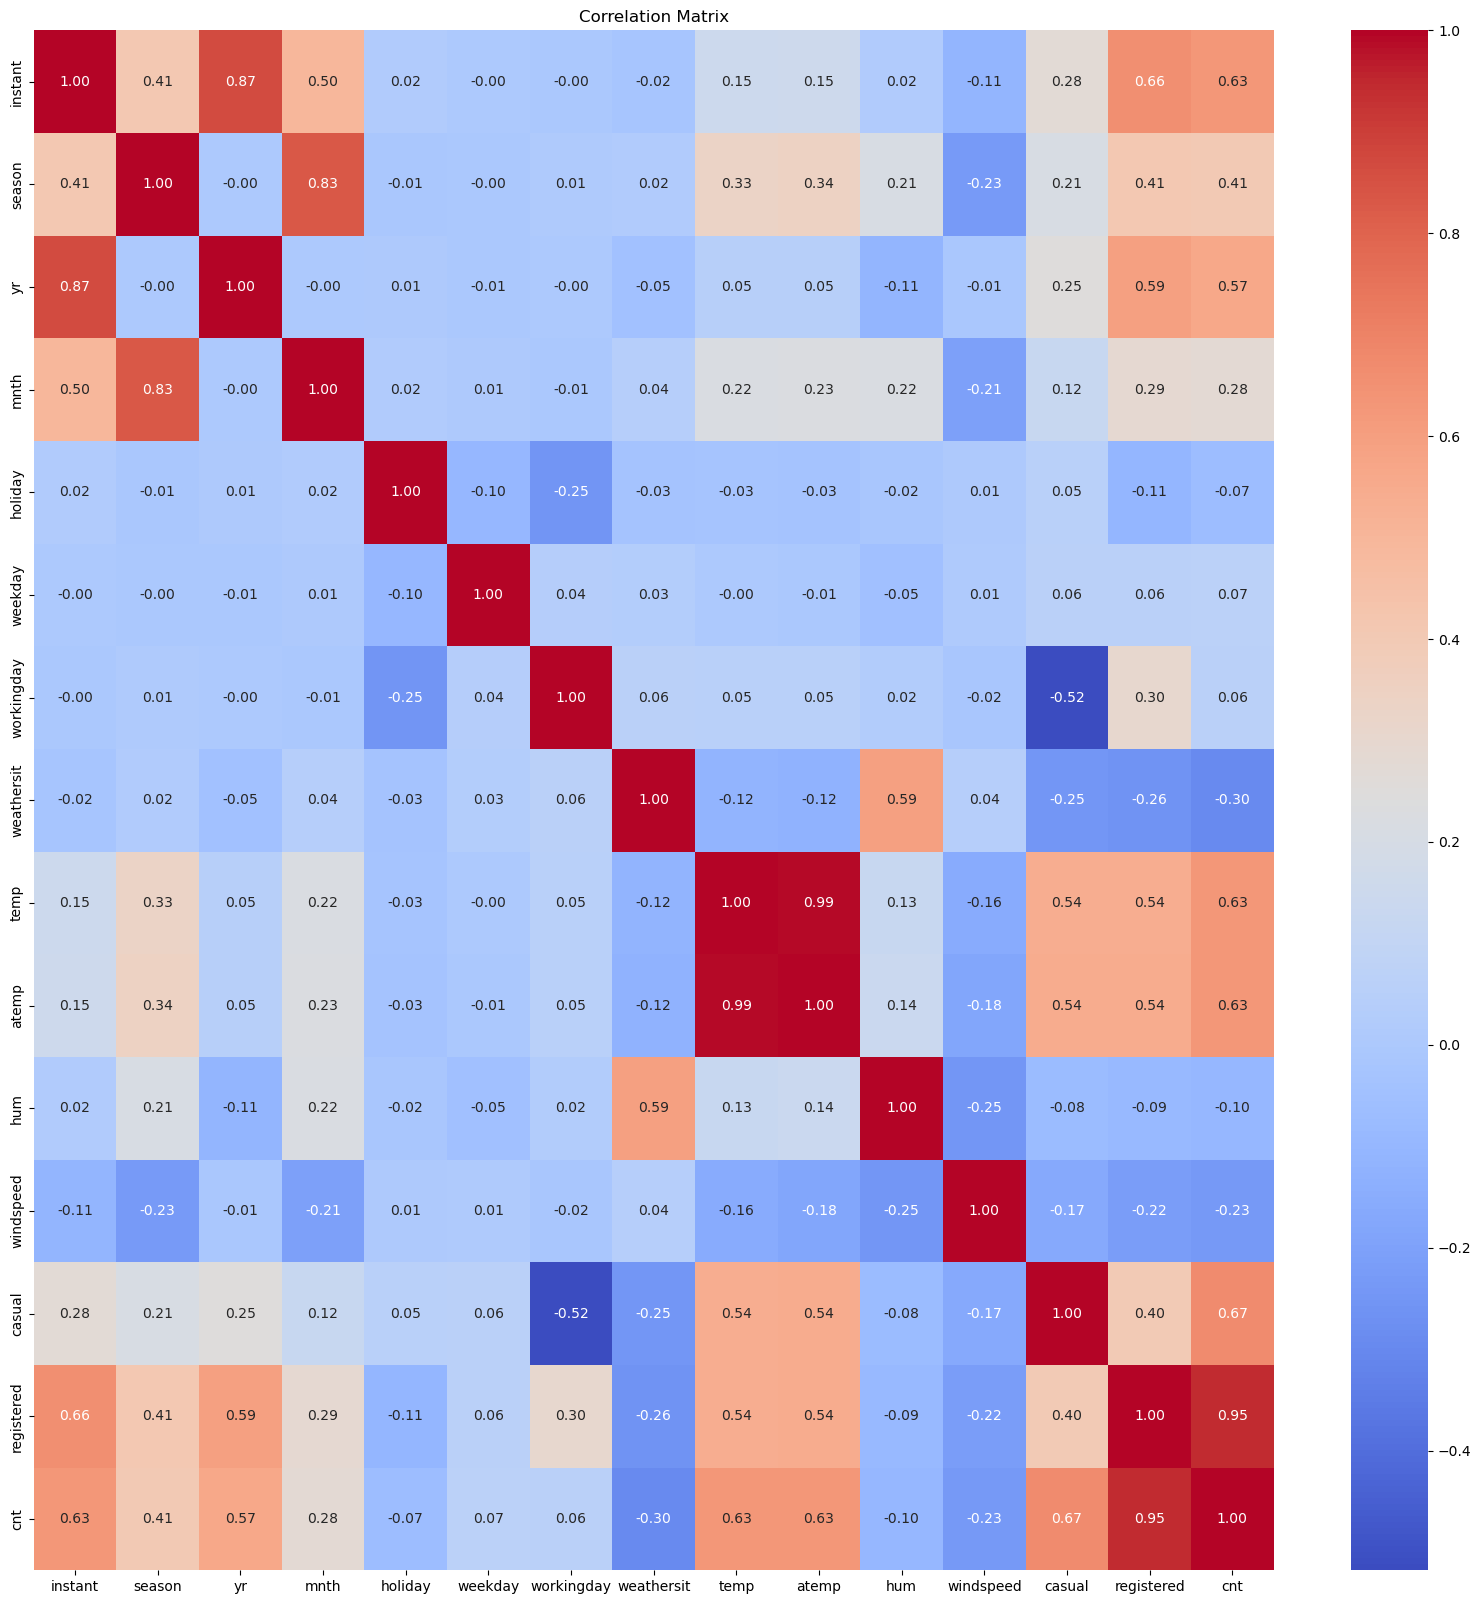

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Divide data into features and target

In [44]:
X = df.drop(['casual', 'registered', 'cnt'], axis=1)
y = df[['cnt']]

In [45]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [14]:
y.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


# Label Encoding categorical data with One-Hot Encoding

In [46]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
X_encoded = pd.get_dummies(X, columns=categorical_columns, prefix=categorical_columns)

In [47]:
X_encoded.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.363625,0.805833,0.160446,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,False
1,0.363478,0.353739,0.696087,0.248539,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,0.196364,0.189405,0.437273,0.248309,True,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
3,0.200000,0.212122,0.590435,0.160296,True,False,False,False,True,False,...,True,False,False,False,False,False,True,True,False,False
4,0.226957,0.229270,0.436957,0.186900,True,False,False,False,True,False,...,False,True,False,False,False,False,True,True,False,False


In [68]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

In [69]:
X_encoded.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,-0.826662,-0.679946,1.250171,-0.387892,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,False
1,-0.721095,-0.740652,0.479113,0.749602,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,-1.634657,-1.749767,-1.339274,0.746632,True,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
3,-1.614780,-1.610270,-0.263182,-0.389829,True,False,False,False,True,False,...,True,False,False,False,False,False,True,True,False,False
4,-1.467414,-1.504971,-1.341494,-0.046307,True,False,False,False,True,False,...,False,True,False,False,False,False,True,True,False,False


# Split data into training and test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2,random_state = 1)
print(f'Initial size: {len(X)}, Train size: {len(X_train)}, Test size: {len(X_test)}')

Initial size: 731, Train size: 584, Test size: 147


# Linear Regressor

## Create & Train model while looking for best hyperparameter

In [81]:
model = LinearRegression()

# Define the hyperparameter grid
param_grid = {'fit_intercept': [True, False]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'fit_intercept': True}


## Create and Train model with the best hyperparameter

In [82]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

LinearRegression()

## Test & Evaluate model

In [83]:
y_pred = linear_model.predict(X_test)

In [84]:
r2 =  "{:.2f}".format(r2_score(y_test, y_pred))
mse =  "{:.2f}".format(mean_squared_error(y_test, y_pred))
mae =  "{:.2f}".format(mean_absolute_error(y_test, y_pred))

print('Linear Regressor \n')
print(f"Coefficient of Determination: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absoluter Error: {mae}")

Linear Regressor 

Coefficient of Determination: 0.78
Mean Squared Error: 805816.90
Mean Absoluter Error: 634.52


# Polynomial Regressor

## Create & Train model while looking for the best hyperparameter

In [85]:
from sklearn.pipeline import make_pipeline

In [93]:
# Define the pipeline with PolynomialFeatures and LinearRegression
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Specify the hyperparameter grid
param_grid = {
    'polynomialfeatures__degree': [1, 3, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_degree = grid_search.best_params_['polynomialfeatures__degree']
print(f'Best Degree of Polynomial Features: {best_degree}')


Best Degree of Polynomial Features: 1


In [94]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [95]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [96]:
y_pred_poly = poly_model.predict(X_test_poly)

In [98]:
r2_poly = "{:.2f}".format(r2_score(y_test, y_pred_poly))
mse_poly = "{:.2f}".format(mean_squared_error(y_test, y_pred_poly))
mae_poly = "{:.2f}".format(mean_absolute_error(y_test, y_pred_poly))

print(f'Polynomial Regressor - Degree {2}\n')
print(f'Coefficient of Determination: {r2_poly}')
print(f'Mean Squared Error: {mse_poly}')
print(f'Mean Absolute Error: {mae_poly}')

Polynomial Regressor - Degree 2

Coefficient of Determination: -357251523131064119721984.00
Mean Squared Error: 1320244115181353311079023771648.00
Mean Absolute Error: 214364107983106.69
